# Kerasによるニューラルネット実装例(MNIST)

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
import h5py
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 自分で設定するパラメータ

# バッチサイズ
batch_size = 1000

# エポック数
epochs = 50

In [3]:
# データ抽出
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot-label に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [4]:
# モデルの構築
model = Sequential()

# 最初の隠れ層(入力784 -> 出力150)
model.add(Dense(512, activation="relu",input_shape=(784,)))
model.add(Dropout(0.2))

# 2つ目の隠れ層(入力150 -> 出力2)
## 隠れ層は以下の2行をコピペすることで追加できます
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(60, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# 出力層(入力5 -> 出力10)
model.add(Dense(10, activation='softmax'))

# モデル概要表示
model.summary()

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# フィッティング(学習)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# スコアの計算・表示
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               61560     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                7260      
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1220      
__________

InternalError: Blas GEMM launch failed : a.shape=(1000, 784), b.shape=(784, 512), m=1000, n=512, k=784
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_arg_dense_1_input_0_0/_19, dense_1/kernel/read)]]
	 [[Node: mul_2/_39 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_1220_mul_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'dense_1/MatMul', defined at:
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-33a37bb1d9c0>", line 5, in <module>
    model.add(Dense(512, activation="relu",input_shape=(784,)))
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/keras/models.py", line 443, in add
    layer(x)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/keras/engine/topology.py", line 596, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/keras/layers/core.py", line 843, in call
    output = K.dot(inputs, self.kernel)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 976, in dot
    out = tf.matmul(x, y)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 1816, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 1217, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/ubuntu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(1000, 784), b.shape=(784, 512), m=1000, n=512, k=784
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_arg_dense_1_input_0_0/_19, dense_1/kernel/read)]]
	 [[Node: mul_2/_39 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_1220_mul_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


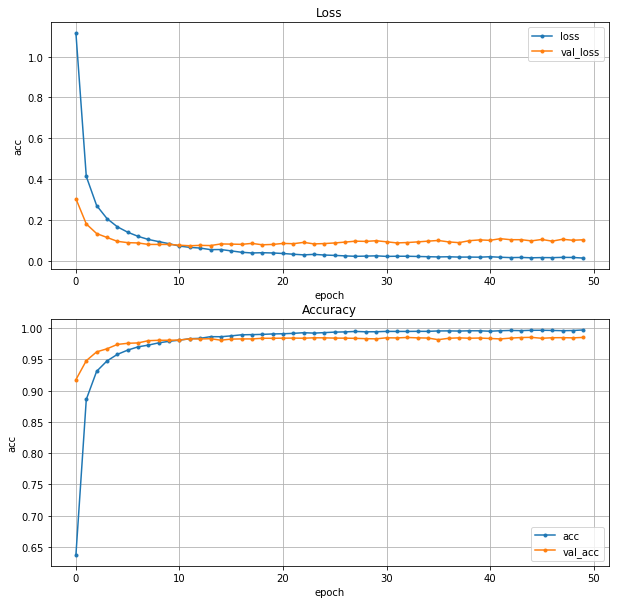

In [28]:
# 学習の様子をプロット
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [ ]:
import h5py
print(h5py)
# 学習モデルの保存
model.save("mnist_data.h5")

# モデルのテスト

In [29]:
# 画像の読み込み
from PIL import Image
import numpy as np


#画像の読み込み
im = Image.open("./tegaki3.jpg")

In [30]:
# 画像を白黒に変換
gray_img = im.convert('L')

# 画像の解像度を変換
gray_img = gray_img.resize((28,28))

#画像をarrayに変換
im_list = np.array(gray_img, 'f')

### 入力画像によって変更

In [31]:
##白地に黒文字の場合は実行
##白黒反転をし，正規化
im_list = 1 - im_list/255.

##黒地に白文字の場合は実行
##正規化
#im_list = im_list/255.

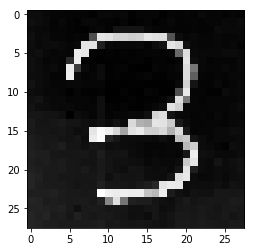

In [32]:
#入力画像の表示
plt.imshow(im_list,cmap=plt.get_cmap('gray'))

In [33]:
# 保存したモデルを読み込む場合は実行
# model = keras.models.load_model('./mnist_data.h5')

# 画像判別
test = im_list.reshape(1,784)
print(model.predict(test))
print('\n')
print('Result:',np.argmax(model.predict(test)[0]))

[[  8.65500624e-05   3.95083007e-05   1.69991341e-03   9.94563878e-01
    3.19098435e-05   7.15829199e-04   1.20104887e-04   1.01638213e-03
    1.42527197e-03   3.00657499e-04]]


Result: 3
